In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

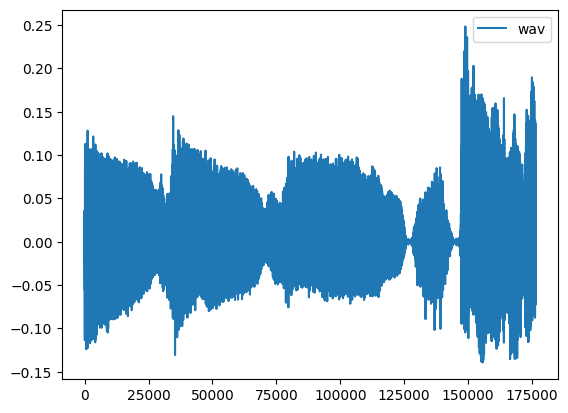

In [3]:
AUDIO_PATH = '/home/yytung/projects/MixingSecrets/dataset/Plums/raw_tracks/06_LeadVox.wav'
wav, sr = sf.read(AUDIO_PATH)
wav = wav[sr*15:sr*19]
ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Compressor

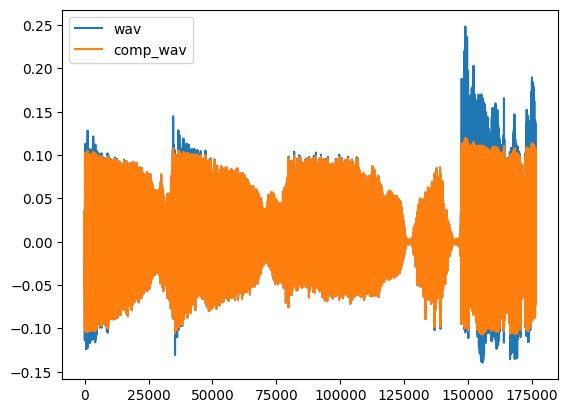

In [4]:
from diffFx_pytorch.processors.dynamics.compressor import Compressor
COMP_DSP_PARAMS = {
    'threshold_db': -20.0,
    'ratio': 5.0,
    'knee_db': 2.0,
    'attack_ms': 10.0,
    'release_ms': 1000.0,
    'makeup_db': 0.0
}

Processor = Compressor(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),      label='comp_wav')
plt.legend()

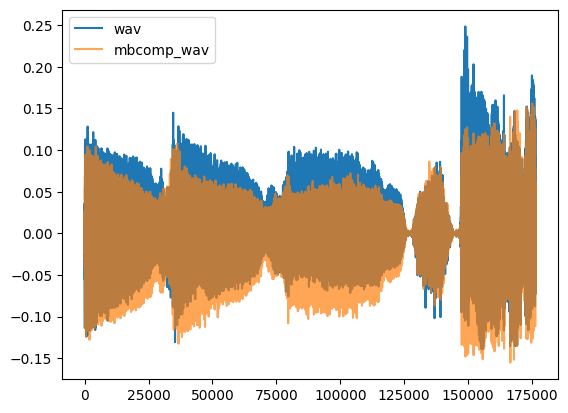

In [5]:
from diffFx_pytorch.processors.dynamics.compressor import MultiBandCompressor
MBCOMP_DSP_PARAMS = {
    'band0_threshold_db': -24.0,  # Low band
    'band0_ratio': 4.0,
    'band0_knee_db': 2.0,
    'band0_attack_ms': 10.0,
    'band0_release_ms': 100.0,
    'band0_makeup_db': 0.0,
    'band1_threshold_db': -20.0,  # Mid band
    'band1_ratio': 3.0,
    'band1_knee_db': 6.0,
    'band1_attack_ms': 5.0,
    'band1_release_ms': 50.0,
    'band1_makeup_db': 0.0,
    'band2_threshold_db': -20.0,  # High band
    'band2_ratio': 2.0,
    'band2_knee_db': 6.0,
    'band2_attack_ms': 1.0,
    'band2_release_ms': 20.0,
    'band2_makeup_db': 0.0,
    'crossover0_freq': 200.0,     # Low-Mid split
    'crossover1_freq': 2000.0     # Mid-High split
}   

Processor = MultiBandCompressor(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
mbcomp_wav = Processor(test_wav, None, MBCOMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mbcomp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mbcomp_wav.squeeze().cpu().numpy(),    alpha=0.7,  label='mbcomp_wav')
plt.legend()

## Limiter

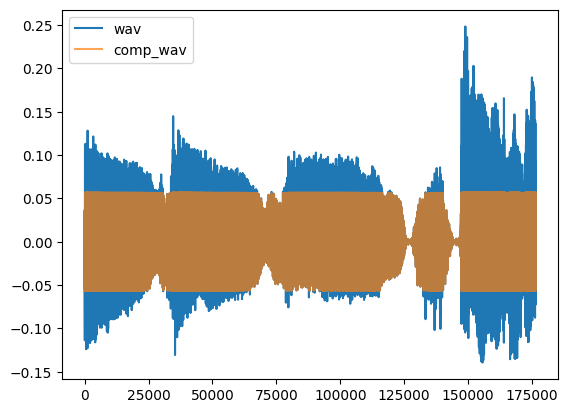

In [6]:
from diffFx_pytorch.processors.dynamics.limiter import Limiter
COMP_DSP_PARAMS = {
    'threshold_db': -25.0,
    'ratio': 80.0,
    'knee_db': 2.0,
    'attack_ms': 10.0,
    'release_ms': 1000.0,
    'makeup_db': 0.0
}

Processor = Limiter(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.7, label='comp_wav')
plt.legend()

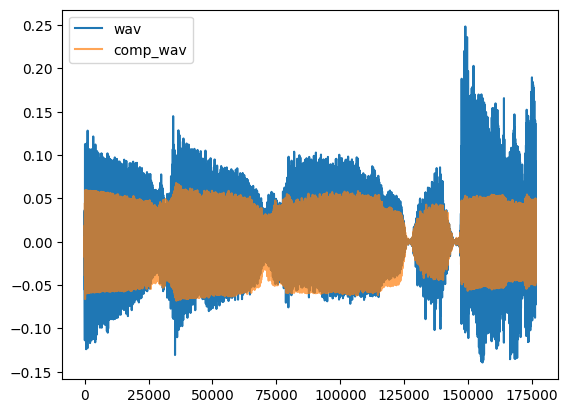

In [7]:
from diffFx_pytorch.processors.dynamics.limiter import MultiBandLimiter
COMP_DSP_PARAMS = {
    'band0_threshold_db': -20.0,   # Low band
    'band0_ratio': 100.0,
    'band0_knee_db': 0.1,
    'band0_attack_ms': 0.1,
    'band0_release_ms': 50.0,
    'band0_makeup_db': 0.0,
    'band1_threshold_db': -30.0,   # Mid band
    'band1_ratio': 100.0,
    'band1_knee_db': 0.1,
    'band1_attack_ms': 0.1,
    'band1_release_ms': 30.0,
    'band1_makeup_db': 0.0,
    'band2_threshold_db': -40.0,   # High band
    'band2_ratio': 100.0,
    'band2_knee_db': 0.1,
    'band2_attack_ms': 0.1,
    'band2_release_ms': 20.0,
    'band2_makeup_db': 0.0,
    'crossover0_freq': 200.0,     # Low-Mid split
    'crossover1_freq': 2000.0     # Mid-High split
}

Processor = MultiBandLimiter(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.7, label='comp_wav')
plt.legend()

## Expander

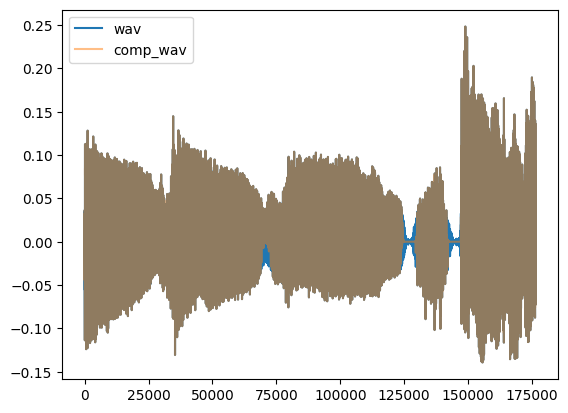

In [8]:
from diffFx_pytorch.processors.dynamics.expander import Expander
COMP_DSP_PARAMS = {
    'threshold_db': -30.0,
    'ratio': 10.0,  
    'knee_db': 2.0,
    'attack_ms': 5,
    'release_ms': 200.0,
    'makeup_db': 0.0
}

Processor = Expander(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.5, label='comp_wav')
plt.legend()

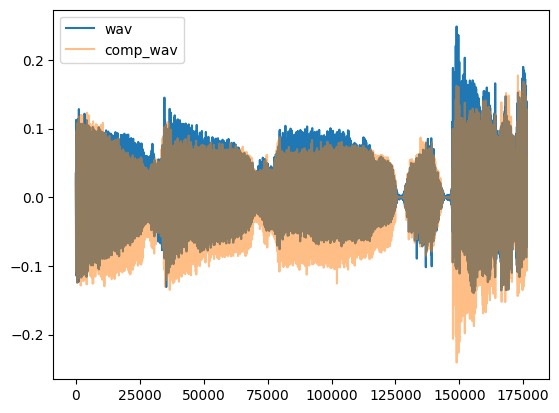

In [9]:
from diffFx_pytorch.processors.dynamics.expander import MultiBandExpander
COMP_DSP_PARAMS = {
    'band0_threshold_db': -40.0,  # Low band
    'band0_ratio': 4.0,
    'band0_knee_db': 6.0,
    'band0_attack_ms': 10.0,
    'band0_release_ms': 100.0,
    'band1_threshold_db': -40.0,  # Mid band
    'band1_ratio': 3.0,
    'band1_knee_db': 6.0,
    'band1_attack_ms': 5.0,
    'band1_release_ms': 50.0,
    'band2_threshold_db': -40.0,  # High band
    'band2_ratio': 2.0,
    'band2_knee_db': 6.0,
    'band2_attack_ms': 1.0,
    'band2_release_ms': 20.0,
    'crossover0_freq': 200.0,     # Low-Mid split
    'crossover1_freq': 2000.0     # Mid-High split
}  

Processor = MultiBandExpander(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.5, label='comp_wav')
plt.legend()

## Noise Gate

In [10]:
from diffFx_pytorch.processors.dynamics.noisegate import NoiseGate
COMP_DSP_PARAMS = {
    'threshold_db': -40.0,
    'range_db': -40.0,  
    'knee_db': 2.0,
    'attack_ms': 5,  
    'release_ms': 200.0
}

Processor = NoiseGate(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.5, label='comp_wav')
plt.legend()

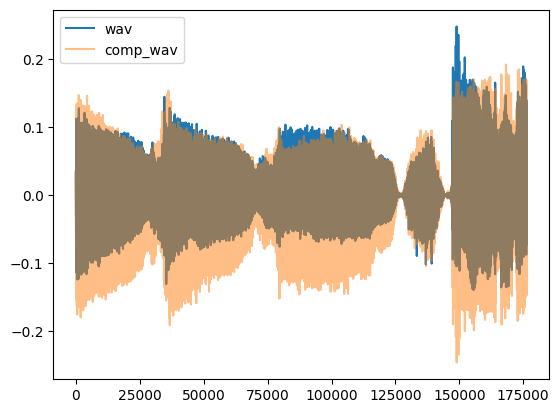

In [11]:
from diffFx_pytorch.processors.dynamics.noisegate import MultiBandNoiseGate
COMP_DSP_PARAMS = {
    'band0_threshold_db': -24.0,  # Low band
    'band0_range_db': 4.0,
    'band0_knee_db': 6.0,
    'band0_attack_ms': 10.0,
    'band0_release_ms': 100.0,
    'band1_threshold_db': -20.0,  # Mid band
    'band1_range_db': 3.0,
    'band1_knee_db': 6.0,
    'band1_attack_ms': 5.0,
    'band1_release_ms': 50.0,
    'band2_threshold_db': -30.0,  # High band
    'band2_range_db': 2.0,
    'band2_knee_db': 6.0,
    'band2_attack_ms': 1.0,
    'band2_release_ms': 20.0,
    'crossover0_freq': 200.0,     # Low-Mid split
    'crossover1_freq': 2000.0     # Mid-High split
}   

Processor = MultiBandNoiseGate(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.5, label='comp_wav')
plt.legend()